## Reference:https://www.kaggle.com/apapiu/regularized-linear-models/notebook

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy.stats import skew
import os
p='./input'

In [3]:
train_df=pd.read_csv(os.path.join(p,"train.csv"))
test_df=pd.read_csv(os.path.join(p,"test.csv"))

In [13]:
print(test_df.shape)
test_df.head()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [14]:
print(train_df.shape)
train_df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
all_data=pd.concat([train_df.loc[:,"MSSubClass":"SaleCondition"],test_df.loc[:,"MSSubClass":"SaleCondition"]])
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [12]:
all_data.shape

(2919, 79)

In [5]:
train_df["log1pSalePrice"]=train_df["SalePrice"].apply(np.log1p)

In [18]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,log1pSalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,12.429220


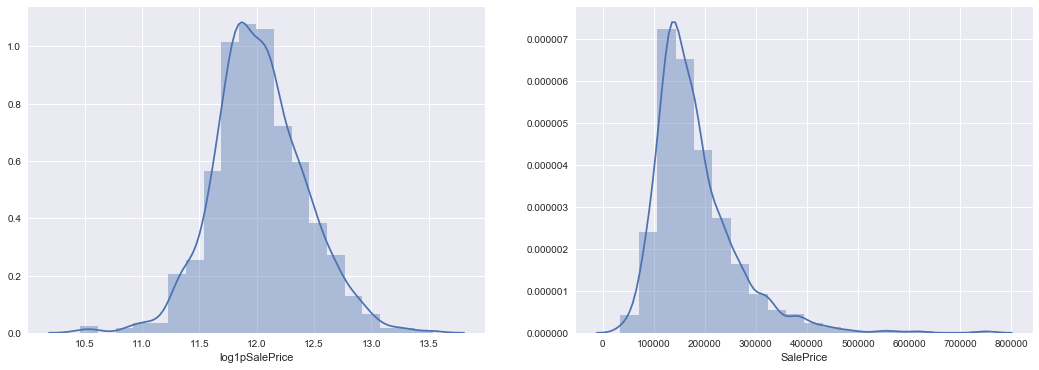

In [6]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(18,6))
sns.distplot(train_df.log1pSalePrice,bins=20,ax=ax1)
sns.distplot(train_df.SalePrice,bins=20,ax=ax2)
#ax1.hist(train_df.log1pSalePrice,bins=20)
#ax2.hist(train_df.SalePrice,bins=20)

In [7]:
numeric_fea=all_data.dtypes[all_data.dtypes!="object"].index
numeric_fea

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [8]:
#skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
#skewed_feats = skewed_feats[skewed_feats > 0.75]
#skewed_feats = skewed_feats.index

skewed_feats=train_df[numeric_fea].apply(lambda x:skew(x.dropna()))
skewed_feats=skewed_feats[skewed_feats>0.75]
skewed_feats.index
skewed_feats=skewed_feats.index


all_data[skewed_feats] = np.log1p(all_data[skewed_feats])
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,4.110874,RL,4.189655,9.042040,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.0,2,2008,WD,Normal
1,3.044522,RL,4.394449,9.169623,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0.0,0.0,NaN,NaN,NaN,0.0,5,2007,WD,Normal
2,4.110874,RL,4.234107,9.328212,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.0,9,2008,WD,Normal
3,4.262680,RL,4.110874,9.164401,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0.0,0.0,NaN,NaN,NaN,0.0,2,2006,WD,Abnorml
4,4.110874,RL,4.442651,9.565284,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0.0,0.0,NaN,NaN,NaN,0.0,12,2008,WD,Normal


In [9]:
all_data=pd.get_dummies(all_data)
all_data=all_data.fillna(all_data.mean())
all_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,0,0,0,1,0,0,0,0,1,0


In [10]:
X_train=all_data.iloc[:train_df.shape[0],:]
X_test=all_data.iloc[test_df.shape[0]:,:]
y=train_df.log1pSalePrice
print(y.shape)
print(X_train.shape)
print(X_test.shape)

(1460,)
(1460, 288)
(1460, 288)


In [11]:
from sklearn.linear_model import Ridge,RidgeCV,ElasticNet,ElasticNetCV,LassoLarsCV,LassoCV
from sklearn.model_selection import cross_val_score


In [12]:
def rsme_cv(model):
    rsme=np.sqrt(-cross_val_score(model,X_train,y=y,scoring="neg_mean_squared_error",cv=5))
    
    return rsme

In [13]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rsme_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]
cv_result=pd.Series(cv_ridge,index=alphas)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [14]:
cv_result

0.05     0.138936
0.10     0.137775
0.30     0.135014
1.00     0.131362
3.00     0.128649
5.00     0.127822
10.00    0.127337
15.00    0.127529
30.00    0.128959
50.00    0.130994
75.00    0.133164
dtype: float64

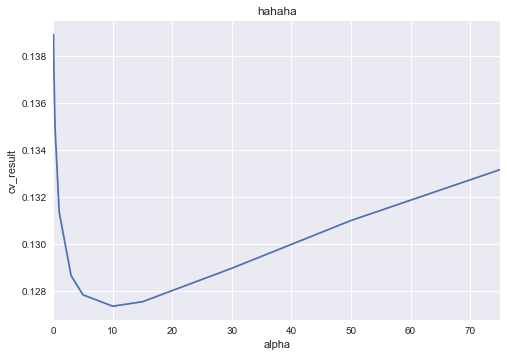

In [15]:
cv_result.plot(title="hahaha")
plt.xlabel("alpha")
plt.ylabel("cv_result")

In [16]:
print(cv_result.min())

0.127337346687


In [17]:
model_lasso=LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train,y)
rsme_cv(model_lasso).mean()

<class 'numpy.ndarray'>


0.12314421090977443

In [94]:
coef_=pd.Series(model_lasso.coef_,index=X_train.columns)

In [99]:
coef_[coef_==0].shape

(178,)

In [108]:
import_cof=pd.concat([coef_.sort_values().head(10),coef_.sort_values().tail(10)])
import_cof.shape

(20,)

In [109]:
import_cof

RoofMatl_ClyTile        -0.704161
MSZoning_C (all)        -0.292023
Condition2_PosN         -0.190552
Neighborhood_Edwards    -0.052560
SaleCondition_Abnorml   -0.047116
MSZoning_RM             -0.037698
CentralAir_N            -0.035440
GarageCond_Fa           -0.031688
LandContour_Bnk         -0.030934
SaleType_WD             -0.030656
OverallQual              0.053160
KitchenQual_Ex           0.063709
Exterior1st_BrkFace      0.070464
Neighborhood_NridgHt     0.071620
LotArea                  0.071826
Functional_Typ           0.072597
Neighborhood_NoRidge     0.085717
Neighborhood_Crawfor     0.105138
Neighborhood_StoneBr     0.112493
GrLivArea                0.400009
dtype: float64

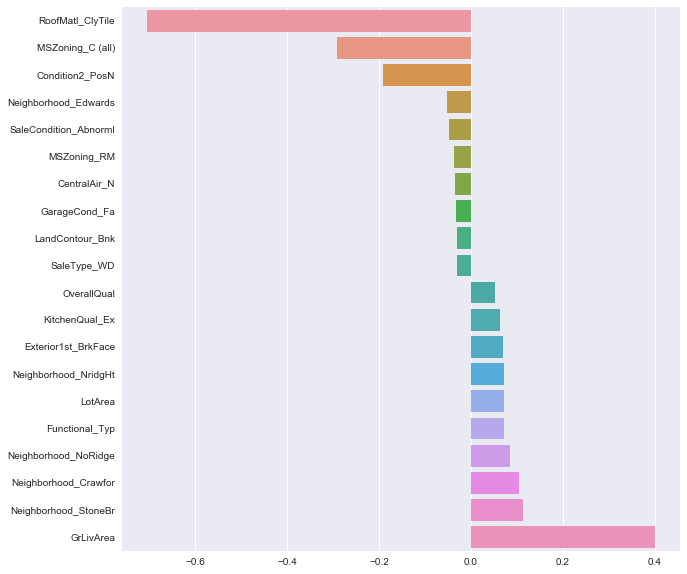

In [118]:
fig,ax=plt.subplots(figsize=(10,10))
sns.barplot(x=import_cof.values,y=import_cof.index,ax=ax)

In [18]:
import xgboost as xgb

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [123]:
dtrain=xgb.DMatrix(X_train,label=y)
dtest=xgb.DMatrix(X_test)

In [124]:
params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

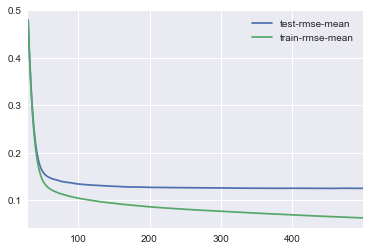

In [126]:
model.loc[30:,["test-rmse-mean","train-rmse-mean"]].plot()

In [129]:
xgb_model=xgb.XGBRegressor(max_depth=2,n_estimators=360,learning_rate=0.1)
xgb_model.fit(X_train,y)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=360, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [132]:
xgb_preds = np.expm1(xgb_model.predict(X_test))
lasso_preds = np.expm1(model_lasso.predict(X_test))

In [133]:
predictions=pd.DataFrame({"xgb":xgb_preds,"lasso":lasso_preds})

In [135]:
predictions.head()

,lasso,xgb
0,141113.148975,141624.421875
1,119958.035681,120528.960938
2,151482.567322,156569.953125
3,180200.853648,186196.890625
4,197515.619193,192304.500000


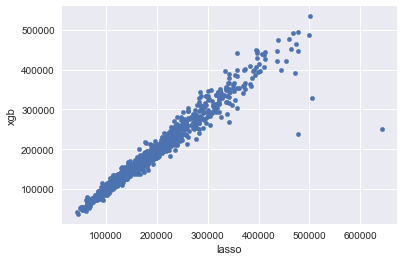

In [139]:
predictions.plot(x="lasso",y="xgb",kind="scatter")

In [142]:
preds=0.7*predictions.lasso+0.3*predictions.xgb  #blend uncorrelated result
preds.head()

0    141266.532408
1    120129.316383
2    153008.785406
3    181999.667866
4    195952.284998
dtype: float64

In [2]:
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l1
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [20]:
X_train_keras=StandardScaler().fit_transform(X_train)

In [25]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train_keras, y, random_state = 3)

In [26]:
X_tr.shape

(1095, 288)

In [29]:
model=Sequential()
#model.add(Dense(200,input_dim=X_tr.shape[1],kernel_regularizer=l1(0.001)))
model.add(Dense(1,input_dim=X_tr.shape[1],kernel_regularizer=l1(0.001)))
model.compile(loss = "mse", optimizer = "adam")

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 289       
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [31]:
hist=model.fit(x=X_tr,y=y_tr,validation_data=(X_val,y_val))

Train on 1095 samples, validate on 365 samples
Epoch 1/1
1095/1095 [==============================] - 1s 552us/step - loss: 146.7682 - val_loss: 147.0236


In [ ]:
pd.Series(model.predict(X_val)[:,0]).hist(bins=20)

In [3]:
?Dense